<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [29]:
# Check for GPU
!nvidia-smi

Mon Feb  9 12:24:16 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.105.08             Driver Version: 580.105.08     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P0             32W /  250W |     261MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.10.0+cpu


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [31]:
# image classification
# object detection
# face recognition

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [32]:
# when model completly fits on the train data and bad on test data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [33]:
# data augmention 
# more data
# dropout
# early stopping

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [15]:
from torchvision.datasets import MNIST, MNIST
import torchvision
train_data = MNIST(
    root="./data",
    train=True,
    download=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data = MNIST(
    root="./data",
    train = False,
    download=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [35]:
train_data[200][0]
len(train_data), len(test_data)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

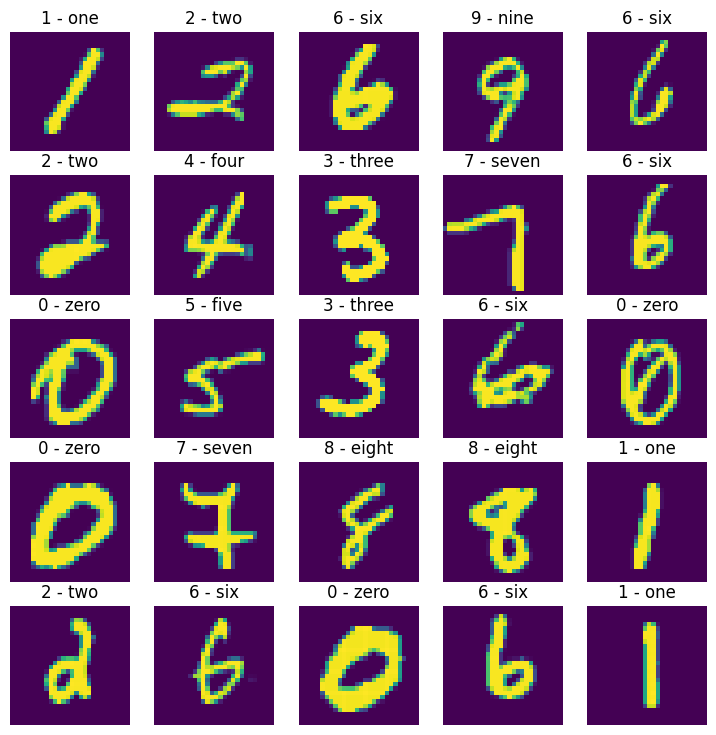

In [16]:
image, label = train_data[0]
class_names = train_data.classes
class_to_index = train_data.class_to_idx
class_names
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 9))
culomns, rows = 5, 5
for i in range(1, culomns*rows+1):
    random_index = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_index]
    fig.add_subplot(rows, culomns, i)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False);


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [17]:
from torch.utils.data import DataLoader
batch_size = 32
train_dataloder = DataLoader(dataset=train_data,
                             batch_size=batch_size,
                             shuffle=True)
test_dataloder = DataLoader(dataset=test_data,
                             batch_size=batch_size,
                             shuffle=False)
train_dataloder

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [18]:
from torch import nn
class MNISTcnn_0(nn.Module):
    def __init__(self, input_shape, outputshape, hidden_units=10):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=7*7*hidden_units, out_features=outputshape)
        )
    def forward(self, x):
        return self.classifier(self.block_2(self.block_1(x)))
model_0 = MNISTcnn_0(input_shape=1, hidden_units=20, outputshape=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
model_0

MNISTcnn_0(
  (block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [46]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [47]:
img, label = next(iter(train_dataloder))
img.shape


torch.Size([32, 1, 28, 28])

### functionize train path and test path

In [ ]:
from helper_functions import accuracy_fn
def train_test_step(model, loss_fn, optimizer):
    train_loss, train_acc, test_loss, test_acc = 0, 0, 0, 0
    model_0.train()
    for batch, (X, y) in enumerate(train_dataloder):
        X, y = X.to(device), y.to(device)
        train_logits = model(X)
        loss = loss_fn(train_logits, y)
        train_loss += loss
        acc = accuracy_fn(y_pred=train_logits.argmax(dim=1), y_true=y)
        train_acc += acc
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloder):
            X, y = X.to(device), y.to(device)
            test_logits = model(X)
            t_loss = loss_fn(test_logits, y)
            test_loss += t_loss
            t_acc = accuracy_fn(y_pred=torch.argmax(test_logits, dim=1), y_true=y)
            test_acc += t_acc
        train_loss /= len(train_dataloder)
        train_acc /= len(train_dataloder)
        test_acc /= len(test_dataloder)
        test_loss /= len(test_dataloder)
    print(f"loss: {train_loss:.5f} | acc: {train_acc:.5f} | test_loss: {test_loss:.5f} | test_acc: {test_acc:.5f}")


In [ ]:
from timeit import default_timer as timer
from helper_functions import accuracy_fn
epochs = 5
start_timer = timer
for i in range(epochs):
    train_test_step(model=model_1, optimizer=optimizer, loss_fn=loss_fn)

RuntimeError: Inplace update to inference tensor outside InferenceMode is not allowed.You can make a clone to get a normal tensor before doing inplace update.See https://github.com/pytorch/rfcs/pull/17 for more details.

### load model parameters from kaggle.com

In [19]:
import torch
model_1 = MNISTcnn_0(input_shape=1, outputshape=10, hidden_units=20).to(device)
model_1.load_state_dict(torch.load("./first_cnn.pth", weights_only=True, map_location=torch.device('cpu')))

<All keys matched successfully>

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [19]:
train_data[0][0].shape

torch.Size([1, 28, 28])

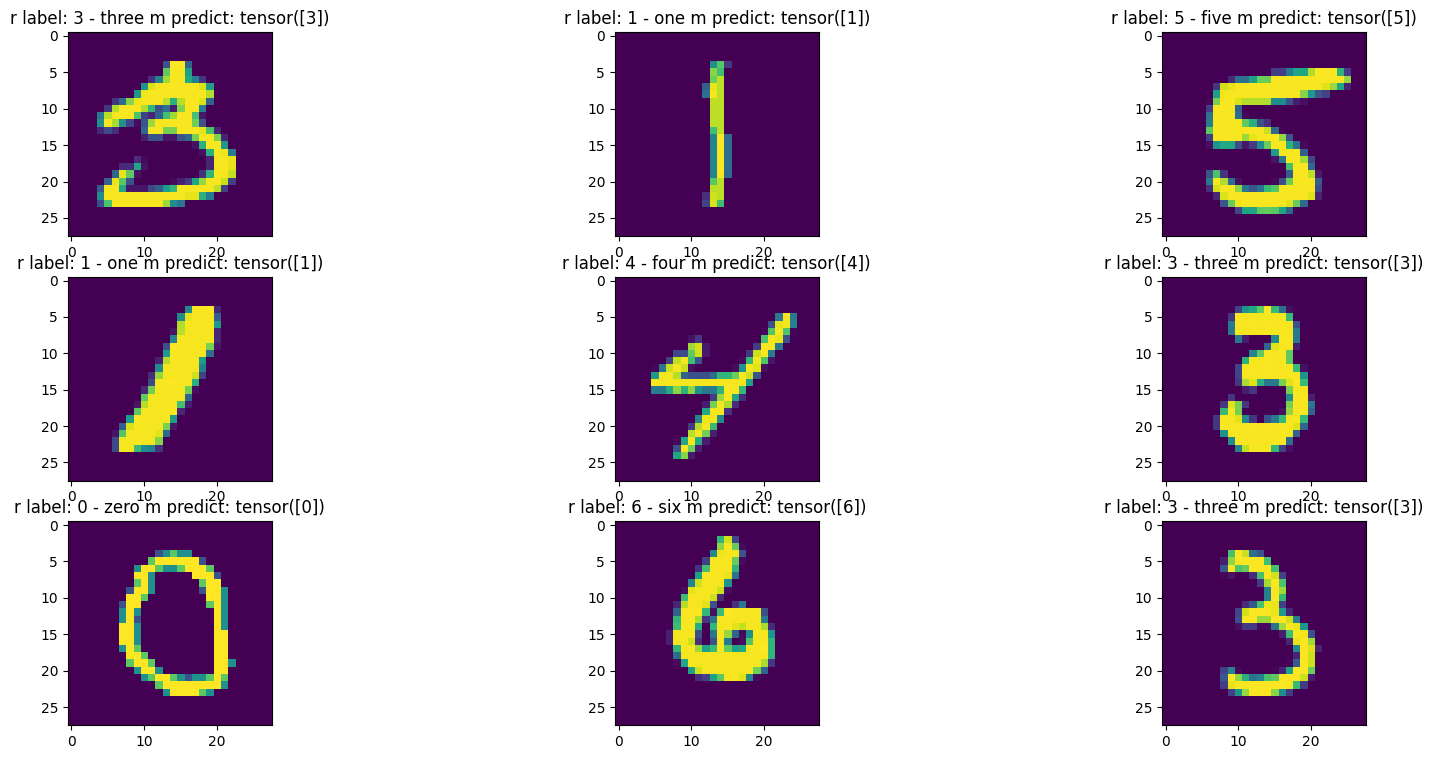

In [20]:
import matplotlib.pyplot as plt
random_num = torch.randint(low=0, high=len(test_data), size = (9, ))
fig = plt.figure(figsize=(20, 9))
rows, culomns = 3, 3
for i, r_number in enumerate(random_num):
    fig.add_subplot(rows, culomns, i+1)
    img, label = test_data[r_number]
    plt.imshow(img.squeeze())
    plt.title(f"r label: {class_names[label]} m predict: {torch.argmax(model_1(torch.unsqueeze(img, dim=0)), dim=1)}")
    

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

tensor([7, 2, 1,  ..., 4, 5, 6])


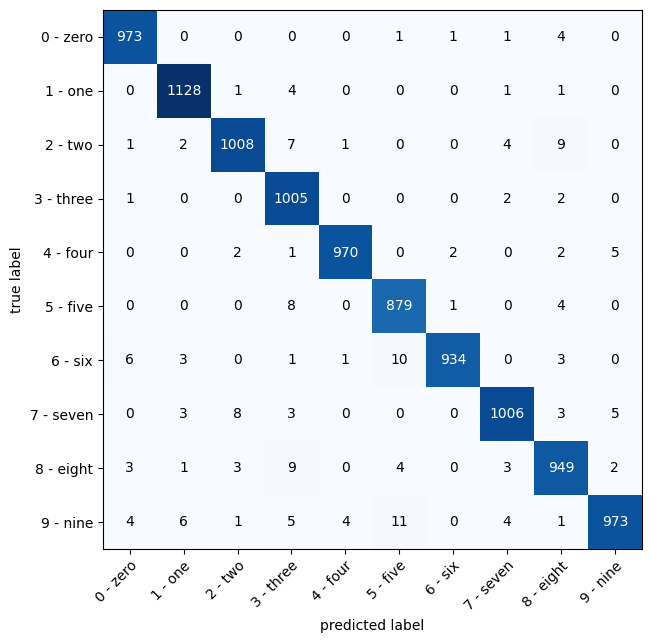

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix
plt_y_preds = []
model_1.eval()
with torch.inference_mode():
    for (X, y) in test_dataloder:
        X, y = X.to(device), y.to(device)
        plt_y_preds.append(model_1(X).argmax(dim=1).cpu())
plt_y_preds = torch.cat(plt_y_preds)
print(plt_y_preds)
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=plt_y_preds , target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

### load data

In [69]:
import torch
from torchvision.datasets import FashionMNIST
import torchvision
train_data = FashionMNIST(
    root="./data1",
    train=True,
    download=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data = FashionMNIST(
    root="./data1",
    train=False,
    download=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)


### visualize data

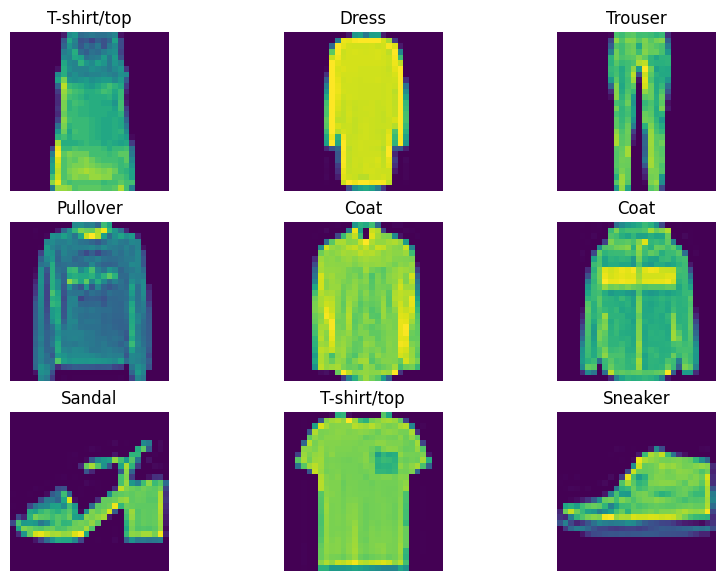

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
rows, culomns = 3, 3
class_names = train_data.classes
r_number = torch.randint(low=0, high=len(train_data), size=(9, ))
for i in range(len(r_number)):
    img, label = train_data[r_number[i]]
    fig.add_subplot(rows, culomns, i+1)
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False)

### data to dataloader

In [71]:
from torch.utils.data import DataLoader
batch_size = 64
train_dataloder = DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True
)
test_dataloder = DataLoader(
    dataset=test_data,
    batch_size=batch_size,
    shuffle=True
)
train_dataloder

### create model

In [72]:
from torch import nn
model_02 = MNISTcnn_0(input_shape=1, outputshape=10, hidden_units=20).to(device=device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_02.parameters(), lr=0.01)

### train model

In [73]:
epochs = 10
for epoch in range(epochs):
    train_test_step(model=model_02, optimizer=optimizer, loss_fn=loss_fn)


NameError: name 'train_test_step' is not defined

### downlod parameters from kaggle.com

In [ ]:
torch.save(obj=model_02.state_dict(), f="/kaggle/working/model_02.pth")

### load model parameters from kaggle.com

In [74]:
model_02.load_state_dict(torch.load(f="./model_02.pth", map_location=torch.device('cpu')))

<All keys matched successfully>

### visualize visualize visualize 

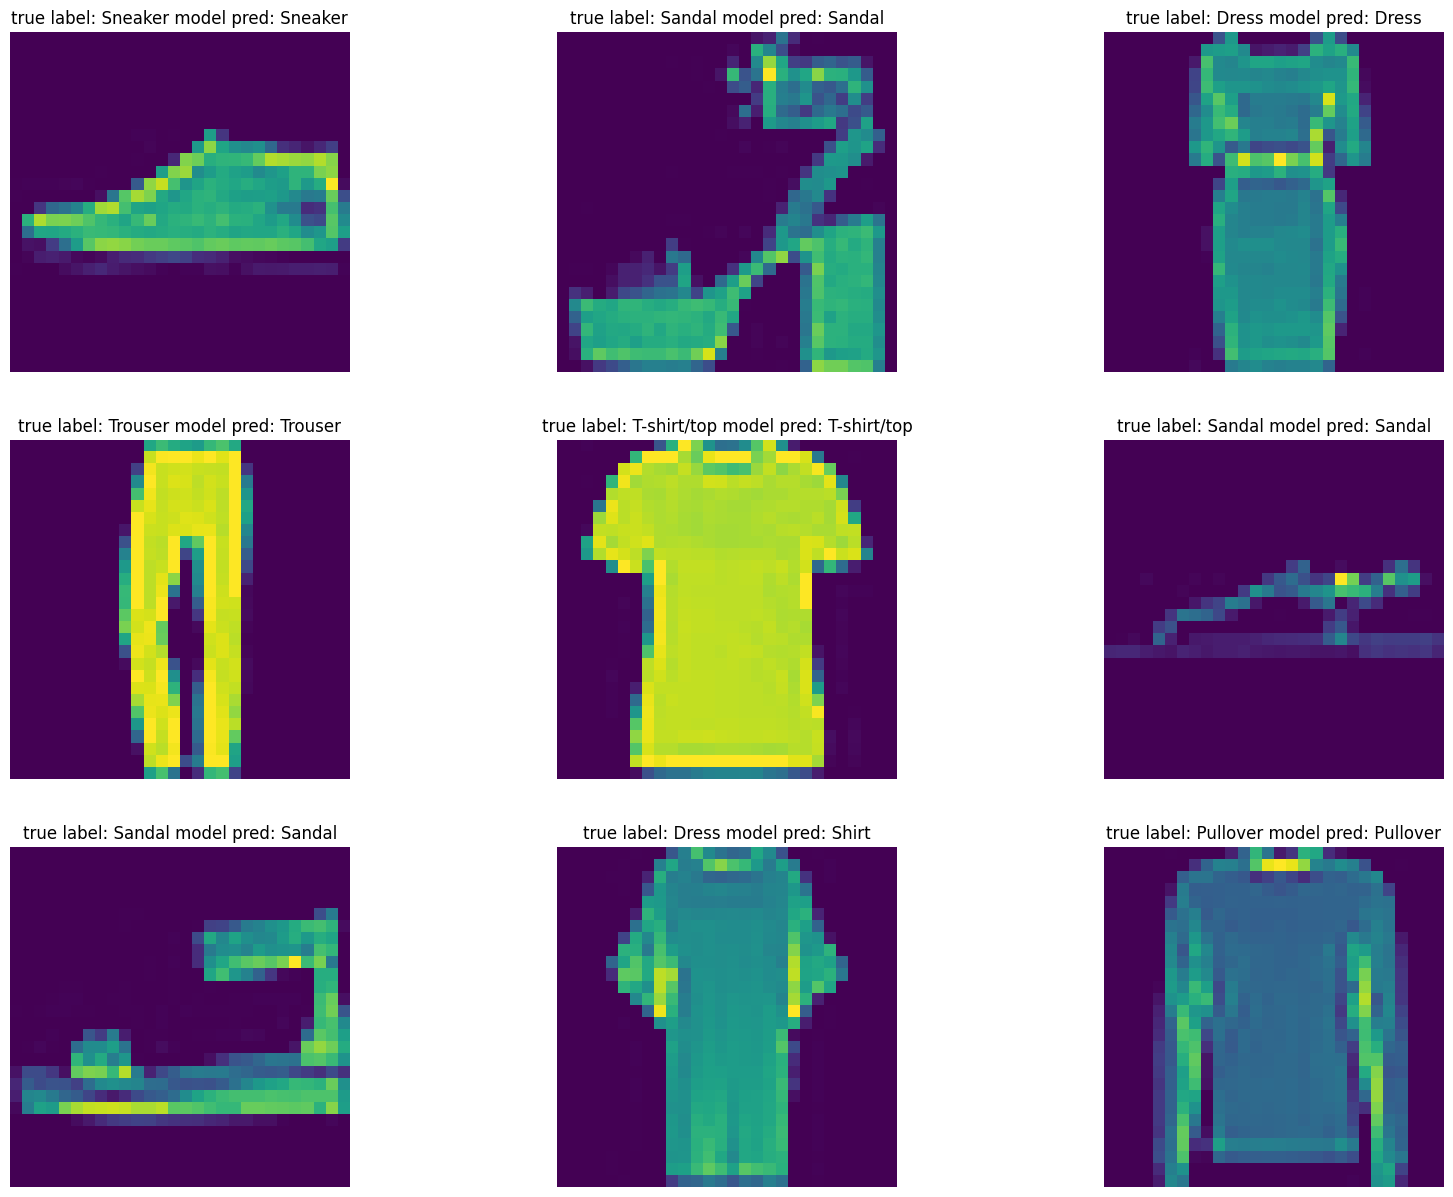

In [75]:
fig = plt.figure(figsize=(20, 15))
rows, culomns = 3, 3
r_number = torch.randint(low=0, high=len(train_data), size=(9, ))
for i in range(len(r_number)):
    img, label = train_data[r_number[i]]
    model_pred = model_02(img.unsqueeze(dim=0))
    fig.add_subplot(rows, culomns, i+1)
    plt.imshow(img.squeeze())
    plt.title(f"true label: {class_names[label]} model pred: {class_names[model_pred.argmax(dim=1)]}")
    plt.axis(False)

In [78]:
from helper_functions import accuracy_fn
model_02.eval()
acc = 0
with torch.inference_mode():
    for (X, y) in test_dataloder:
        acc += accuracy_fn(model_02(X).argmax(dim=1), y)
    acc /= len(test_dataloder)
print(acc)

85.95740445859873


### confusion matrix

tensor([0, 5, 9,  ..., 5, 6, 7])


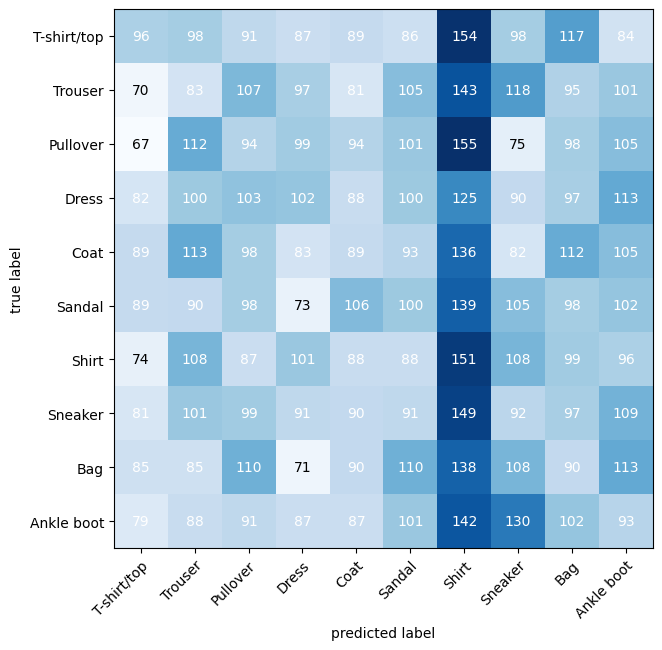

In [82]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix
plt_y_preds = []
model_02.eval()
with torch.inference_mode():
    for (X, y) in test_dataloder:
        X, y = X.to(device), y.to(device)
        plt_y_preds.append(model_02(X).argmax(dim=1).cpu())
plt_y_preds = torch.cat(plt_y_preds)
print(plt_y_preds)
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=plt_y_preds , target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)